TypeError: Image data of dtype object cannot be converted to float

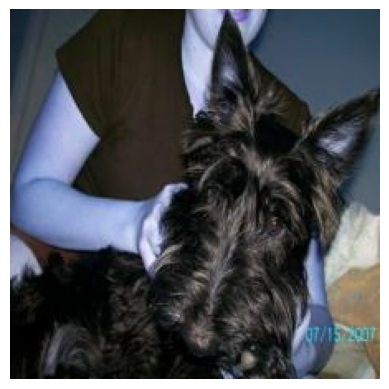

In [15]:
plt.axis('off')
for i in range(0, 100, 10):
    pic = cv2.imread(path + paths[i])
    plt.imshow(pic)
# pic = cv2.imread(path + 'n02097298_9217.jpg')
# print(pic.shape)
# plt.imshow(pic)


In [47]:
cv2.imread('/home/lilla/code/Faskerrr/raw_data/cropped/train/n02097298-Scotch_terrier/n02097298_9217.jpg').shape

(224, 224, 3)

In [7]:
import os,sys
import cv2
from tqdm import tqdm
import re

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [4]:
# path = '/Faskerrr/raw_data/cropped/train/n02097298-Scotch_terrier/'
path_train = '/home/lilla/code/Faskerrr/raw_data/cropped/train/'
folder_train = os.listdir(path_train) 
folder_train

['n02110063-malamute',
 'n02089867-Walker_hound',
 'n02113023-Pembroke',
 'n02112350-keeshond',
 'n02096437-Dandie_Dinmont',
 'n02090622-borzoi',
 'n02097298-Scotch_terrier',
 'n02112706-Brabancon_griffon',
 'n02091467-Norwegian_elkhound',
 'n02086079-Pekinese',
 'n02100583-vizsla',
 'n02093859-Kerry_blue_terrier',
 'n02109047-Great_Dane',
 'n02106550-Rottweiler',
 'n02113978-Mexican_hairless',
 'n02105162-malinois',
 'n02099712-Labrador_retriever',
 'n02087046-toy_terrier',
 'n02095314-wire-haired_fox_terrier',
 'n02099267-flat-coated_retriever',
 'n02090721-Irish_wolfhound',
 'n02088466-bloodhound',
 'n02107142-Doberman',
 'n02089078-black-and-tan_coonhound',
 'n02085936-Maltese_dog',
 'n02107312-miniature_pinscher',
 'n02105855-Shetland_sheepdog',
 'n02091831-Saluki',
 'n02093647-Bedlington_terrier',
 'n02087394-Rhodesian_ridgeback',
 'n02112018-Pomeranian',
 'n02107683-Bernese_mountain_dog',
 'n02106382-Bouvier_des_Flandres',
 'n02097047-miniature_schnauzer',
 'n02108089-boxer',
 '

In [10]:
classes_train = [re.findall('n\d{8}-(.*)', i)[0][:-1] for i in folder_train]
classes_train 

['malamut',
 'Walker_houn',
 'Pembrok',
 'keeshon',
 'Dandie_Dinmon',
 'borzo',
 'Scotch_terrie',
 'Brabancon_griffo',
 'Norwegian_elkhoun',
 'Pekines',
 'vizsl',
 'Kerry_blue_terrie',
 'Great_Dan',
 'Rottweile',
 'Mexican_hairles',
 'malinoi',
 'Labrador_retrieve',
 'toy_terrie',
 'wire-haired_fox_terrie',
 'flat-coated_retrieve',
 'Irish_wolfhoun',
 'bloodhoun',
 'Doberma',
 'black-and-tan_coonhoun',
 'Maltese_do',
 'miniature_pinsche',
 'Shetland_sheepdo',
 'Saluk',
 'Bedlington_terrie',
 'Rhodesian_ridgebac',
 'Pomerania',
 'Bernese_mountain_do',
 'Bouvier_des_Flandre',
 'miniature_schnauze',
 'boxe',
 'Greater_Swiss_Mountain_do',
 'Chesapeake_Bay_retrieve',
 'Sussex_spanie',
 'Australian_terrie',
 'silky_terrie',
 'German_short-haired_pointe',
 'Eskimo_do',
 'American_Staffordshire_terrie',
 'whippe',
 'groenendae',
 'Samoye',
 'miniature_poodl',
 'redbon',
 'Ibizan_houn',
 'Appenzelle',
 'standard_poodl',
 'Irish_sette',
 'Tibetan_terrie',
 'soft-coated_wheaten_terrie',
 'cho',
 

In [15]:
labels = {}
idx = 0
data = []
labels_r = {}

for folder in os.listdir(path):
    idx += 1
    labels[folder] = idx
    labels_r[idx] = folder
    

In [17]:
labels

{'n02110063-malamute': 1,
 'n02089867-Walker_hound': 2,
 'n02113023-Pembroke': 3,
 'n02112350-keeshond': 4,
 'n02096437-Dandie_Dinmont': 5,
 'n02090622-borzoi': 6,
 'n02097298-Scotch_terrier': 7,
 'n02112706-Brabancon_griffon': 8,
 'n02091467-Norwegian_elkhound': 9,
 'n02086079-Pekinese': 10,
 'n02100583-vizsla': 11,
 'n02093859-Kerry_blue_terrier': 12,
 'n02109047-Great_Dane': 13,
 'n02106550-Rottweiler': 14,
 'n02113978-Mexican_hairless': 15,
 'n02105162-malinois': 16,
 'n02099712-Labrador_retriever': 17,
 'n02087046-toy_terrier': 18,
 'n02095314-wire-haired_fox_terrier': 19,
 'n02099267-flat-coated_retriever': 20,
 'n02090721-Irish_wolfhound': 21,
 'n02088466-bloodhound': 22,
 'n02107142-Doberman': 23,
 'n02089078-black-and-tan_coonhound': 24,
 'n02085936-Maltese_dog': 25,
 'n02107312-miniature_pinscher': 26,
 'n02105855-Shetland_sheepdog': 27,
 'n02091831-Saluki': 28,
 'n02093647-Bedlington_terrier': 29,
 'n02087394-Rhodesian_ridgeback': 30,
 'n02112018-Pomeranian': 31,
 'n02107683

In [14]:
# path_train = '/home/lilla/code/Faskerrr/raw_data/cropped/train/'
# folder_train = os.listdir(path_train) 
# folder_train
#cv2.imread('/home/lilla/code/Faskerrr/raw_data/cropped/train/n02097298-Scotch_terrier/n02097298_9217.jpg').shape
data = []
for file in folder_train: 
    img = cv2.imread(f'{path_train}/{folder_train}/{file}')
    data.append([img])


[ WARN:0@667.885] global loadsave.cpp:244 findDecoder imread_('/home/lilla/code/Faskerrr/raw_data/cropped/train//['n02110063-malamute', 'n02089867-Walker_hound', 'n02113023-Pembroke', 'n02112350-keeshond', 'n02096437-Dandie_Dinmont', 'n02090622-borzoi', 'n02097298-Scotch_terrier', 'n02112706-Brabancon_griffon', 'n02091467-Norwegian_elkhound', 'n02086079-Pekinese', 'n02100583-vizsla', 'n02093859-Kerry_blue_terrier', 'n02109047-Great_Dane', 'n02106550-Rottweiler', 'n02113978-Mexican_hairless', 'n02105162-malinois', 'n02099712-Labrador_retriever', 'n02087046-toy_terrier', 'n02095314-wire-haired_fox_terrier', 'n02099267-flat-coated_retriever', 'n02090721-Irish_wolfhound', 'n02088466-bloodhound', 'n02107142-Doberman', 'n02089078-black-and-tan_coonhound', 'n02085936-Maltese_dog', 'n02107312-miniature_pinscher', 'n02105855-Shetland_sheepdog', 'n02091831-Saluki', 'n02093647-Bedlington_terrier', 'n02087394-Rhodesian_ridgeback', 'n02112018-Pomeranian', 'n02107683-Bernese_mountain_dog', 'n0210638

[ WARN:0@667.971] global loadsave.cpp:244 findDecoder imread_('/home/lilla/code/Faskerrr/raw_data/cropped/train//['n02110063-malamute', 'n02089867-Walker_hound', 'n02113023-Pembroke', 'n02112350-keeshond', 'n02096437-Dandie_Dinmont', 'n02090622-borzoi', 'n02097298-Scotch_terrier', 'n02112706-Brabancon_griffon', 'n02091467-Norwegian_elkhound', 'n02086079-Pekinese', 'n02100583-vizsla', 'n02093859-Kerry_blue_terrier', 'n02109047-Great_Dane', 'n02106550-Rottweiler', 'n02113978-Mexican_hairless', 'n02105162-malinois', 'n02099712-Labrador_retriever', 'n02087046-toy_terrier', 'n02095314-wire-haired_fox_terrier', 'n02099267-flat-coated_retriever', 'n02090721-Irish_wolfhound', 'n02088466-bloodhound', 'n02107142-Doberman', 'n02089078-black-and-tan_coonhound', 'n02085936-Maltese_dog', 'n02107312-miniature_pinscher', 'n02105855-Shetland_sheepdog', 'n02091831-Saluki', 'n02093647-Bedlington_terrier', 'n02087394-Rhodesian_ridgeback', 'n02112018-Pomeranian', 'n02107683-Bernese_mountain_dog', 'n0210638

In [13]:
data

[[None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 

In [4]:
def load_data():
    labels = {}
    idx = 0
    data = []
    labels_r = {}
    for folder in os.listdir('/kaggle/input/stanford-dogs-dataset-traintest/cropped/train/'):
        idx += 1
        labels[folder] = idx
        labels_r[idx] = folder
    for folder in os.listdir('/kaggle/input/stanford-dogs-dataset-traintest/cropped/train/')[:5]:
        for file in os.listdir(f'/kaggle/input/stanford-dogs-dataset-traintest/cropped/train/{folder}')[:1250]:
                img = cv2.imread(f'/kaggle/input/stanford-dogs-dataset-traintest/cropped/train/{folder}/{file}')
                img = cv2.resize(img,(112,112))
                data.append([img, np.eye(labels[folder]+1,len(labels))[labels[folder]]])
    np.random.shuffle(data)
    X = []
    y = []
    for d in data:
        X.append(d[0])
        y.append(d[1])
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.0625,shuffle=True)

In [18]:
os.listdir(path_train)[:5]

['n02110063-malamute',
 'n02089867-Walker_hound',
 'n02113023-Pembroke',
 'n02112350-keeshond',
 'n02096437-Dandie_Dinmont']

In [24]:
os.listdir(f'{path_train}/{folder}')[:1250]

['n02091635_3548.jpg:Zone.Identifier',
 'n02091635_2761.jpg:Zone.Identifier',
 'n02091635_1177.jpg:Zone.Identifier',
 'n02091635_2766.jpg:Zone.Identifier',
 'n02091635_2586.jpg:Zone.Identifier',
 'n02091635_1340.jpg:Zone.Identifier',
 'n02091635_1234.jpg',
 'n02091635_1396.jpg:Zone.Identifier',
 'n02091635_2068.jpg:Zone.Identifier',
 'n02091635_920.jpg',
 'n02091635_4045.jpg',
 'n02091635_239.jpg',
 'n02091635_1489.jpg:Zone.Identifier',
 'n02091635_1043.jpg:Zone.Identifier',
 'n02091635_2584.jpg',
 'n02091635_2464.jpg',
 'n02091635_2464.jpg:Zone.Identifier',
 'n02091635_920.jpg:Zone.Identifier',
 'n02091635_1489.jpg',
 'n02091635_1417.jpg',
 'n02091635_3822.jpg',
 'n02091635_2948.jpg',
 'n02091635_2183.jpg:Zone.Identifier',
 'n02091635_1311.jpg',
 'n02091635_965.jpg:Zone.Identifier',
 'n02091635_4377.jpg:Zone.Identifier',
 'n02091635_2277.jpg:Zone.Identifier',
 'n02091635_1372.jpg:Zone.Identifier',
 'n02091635_3916.jpg',
 'n02091635_1621.jpg',
 'n02091635_1083.jpg:Zone.Identifier',
 'n

In [23]:
if 'Zone.Identifier' not in os.listdir(f'{path_train}/{folder}')[:1250]: 
    

True

In [22]:
if 'Zone.Identifier' not in os.listdir(f'{path_train}/{folder}')[:1250]: 
    print(os.listdir(f'{path_train}/{folder}')[:1250])


['n02091635_3548.jpg:Zone.Identifier', 'n02091635_2761.jpg:Zone.Identifier', 'n02091635_1177.jpg:Zone.Identifier', 'n02091635_2766.jpg:Zone.Identifier', 'n02091635_2586.jpg:Zone.Identifier', 'n02091635_1340.jpg:Zone.Identifier', 'n02091635_1234.jpg', 'n02091635_1396.jpg:Zone.Identifier', 'n02091635_2068.jpg:Zone.Identifier', 'n02091635_920.jpg', 'n02091635_4045.jpg', 'n02091635_239.jpg', 'n02091635_1489.jpg:Zone.Identifier', 'n02091635_1043.jpg:Zone.Identifier', 'n02091635_2584.jpg', 'n02091635_2464.jpg', 'n02091635_2464.jpg:Zone.Identifier', 'n02091635_920.jpg:Zone.Identifier', 'n02091635_1489.jpg', 'n02091635_1417.jpg', 'n02091635_3822.jpg', 'n02091635_2948.jpg', 'n02091635_2183.jpg:Zone.Identifier', 'n02091635_1311.jpg', 'n02091635_965.jpg:Zone.Identifier', 'n02091635_4377.jpg:Zone.Identifier', 'n02091635_2277.jpg:Zone.Identifier', 'n02091635_1372.jpg:Zone.Identifier', 'n02091635_3916.jpg', 'n02091635_1621.jpg', 'n02091635_1083.jpg:Zone.Identifier', 'n02091635_663.jpg', 'n02091635_4

In [50]:
## path_train = '/home/lilla/code/Faskerrr/raw_data/cropped/train/'
# folder_train = os.listdir(path_train) 
# folder_train
#cv2.imread('/home/lilla/code/Faskerrr/raw_data/cropped/train/n02097298-Scotch_terrier/n02097298_9217.jpg').shape

def load_data():
    labels = {}
    idx = 0
    data = []
    labels_r = {}
    
    for folder in os.listdir(path_train):
        idx += 1
        labels[folder] = idx
        labels_r[idx] = folder
            
    for folder in os.listdir(path_train)[:5]: 
        for file in os.listdir(f'{path_train}/{folder}')[:1250]:
            if 'Zone.Identifier' not in file: 
                img = cv2.imread(f'{path_train}/{folder}/{file}')
                data.append([img])
    X = []
    y = []
    for d in data:
        X.append(d[0])
        y.append(d[1])
    return X, y 

In [ ]:
X, y = load_data()

In [40]:
X

[array([[[ 48,  70,  81],
         [ 80, 102, 113],
         [ 91, 114, 122],
         ...,
         [ 80, 109, 118],
         [114, 143, 152],
         [127, 156, 165]],
 
        [[106, 128, 139],
         [109, 134, 144],
         [111, 134, 142],
         ...,
         [115, 144, 153],
         [108, 137, 146],
         [ 91, 120, 129]],
 
        [[109, 134, 144],
         [ 83, 110, 120],
         [ 76, 102, 109],
         ...,
         [ 86, 115, 124],
         [ 93, 122, 131],
         [109, 138, 147]],
 
        ...,
 
        [[ 92, 119, 123],
         [105, 132, 136],
         [123, 150, 154],
         ...,
         [ 85, 110, 114],
         [ 82, 107, 109],
         [ 90, 115, 117]],
 
        [[ 60,  86,  92],
         [ 87, 113, 119],
         [144, 170, 176],
         ...,
         [ 61,  86,  88],
         [ 80, 105, 107],
         [104, 129, 131]],
 
        [[150, 176, 182],
         [ 76, 102, 108],
         [103, 129, 135],
         ...,
         [ 84, 109, 111],
  

In [44]:
len()

TypeError: len() takes exactly one argument (0 given)